## Pandas Visualization

In [1]:
# Import dependencies
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
from databaseconfig import user_name, password, local_host

In [2]:
# Connect to postgres
engine = create_engine(f'postgresql://{user_name}:{password}@{local_host}/sql-challenge')
connection = engine.connect()


In [3]:
# Create DataFrame based on SQL Titles table
query = 'select * from titles'
df_titles = pd.read_sql_query(query, con=engine)
df_titles.head()

,emp_no,title,from_date,to_date
0,10004,Engineer,1986-12-01,1995-12-01
1,10005,Staff,1989-09-12,1996-09-12
2,10007,Staff,1989-02-10,1996-02-11
3,10008,Assistant Engineer,1998-03-11,2000-07-31
4,10009,Assistant Engineer,1985-02-18,1990-02-18


In [4]:
# Create DataFrame based on SQL Salaries table
query = 'select * from salaries'
df_salaries = pd.read_sql_query(query, con=engine)
df_salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [5]:
# Merge the titles and salaries DataFrames
merged = pd.merge(df_titles,df_salaries,on='emp_no')
merged.head()

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10004,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
1,10004,Senior Engineer,1995-12-01,2019-11-13,40054,1986-12-01,1987-12-01
2,10005,Staff,1989-09-12,1996-09-12,78228,1989-09-12,1990-09-12
3,10005,Senior Staff,1996-09-12,2019-11-13,78228,1989-09-12,1990-09-12
4,10007,Staff,1989-02-10,1996-02-11,56724,1989-02-10,1990-02-10


In [6]:
# Clean up merged DataFrame
merged_drop = merged.drop(columns =['emp_no','from_date_x','to_date_x','from_date_y','to_date_y'])

# Find the average salary by job title
grouped_df = merged_drop.groupby('title').mean()
grouped_formatted = grouped_df.copy()

grouped_formatted['salary'] = grouped_formatted['salary'].map('${:,.2f}'.format)
grouped_formatted

,salary
title,
Assistant Engineer,"$48,493.20"
Engineer,"$48,539.78"
Manager,"$51,531.04"
Senior Engineer,"$48,506.75"
Senior Staff,"$58,503.29"
Staff,"$58,465.27"
Technique Leader,"$48,580.51"


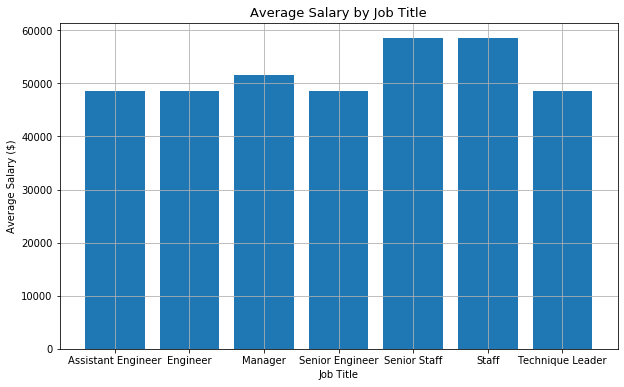

In [8]:
# Plot the average salary by job title
plt.figure(figsize=(10,6))
plt.bar(grouped_df.index,grouped_df['salary'])
plt.xlabel('Job Title')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Job Title',size=13)
plt.grid()
plt.savefig('Images/AvgSalarybyTitle.png')

In [8]:
# Dispose of engine
engine.dispose()